## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option("display.max_rows",None)

In [27]:
df= pd.read_csv('salary_data_cleaned.csv')
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_reqd,spark_reqd,aws_reqd,excel_reqd,job_simp,seniority,desc_len,num_comp,Comapy Name
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,1,data scientist,na,2555,0,Tecolote Research
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,data scientist,na,4828,0,University of Maryland Medical System
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,1,0,1,data scientist,na,3495,0,KnowBe4


In [3]:
#Fixed typo in csv
df.rename(columns={'Comapy Name':'Company Text'}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 29 columns):
Job Title            718 non-null object
Salary Estimate      718 non-null object
Job Description      718 non-null object
Rating               718 non-null float64
Company Name         718 non-null object
Location             718 non-null object
Headquarters         718 non-null object
Size                 718 non-null object
Founded              718 non-null int64
Type of ownership    718 non-null object
Industry             718 non-null object
Sector               718 non-null object
Revenue              718 non-null object
Competitors          718 non-null object
min sal              718 non-null int64
max sal              718 non-null int64
avg                  718 non-null float64
State                718 non-null object
same state           718 non-null int64
age                  718 non-null int64
python_reqd          718 non-null int64
spark_reqd           718 non-null int6

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min sal', 'max sal', 'avg', 'State', 'same state', 'age',
       'python_reqd', 'spark_reqd', 'aws_reqd', 'excel_reqd', 'job_simp',
       'seniority', 'desc_len', 'num_comp', 'Company Text'],
      dtype='object')

In [6]:
df.describe()

,Rating,Founded,min sal,max sal,avg,same state,age,python_reqd,spark_reqd,aws_reqd,excel_reqd,desc_len,num_comp
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,3.621727,1832.675487,75.871866,130.435933,103.153900,0.564067,46.516713,0.545961,0.232591,0.243733,0.532033,3930.667131,1.083565
std,0.811907,504.796154,30.795728,44.101293,36.898694,0.496224,54.436165,0.498230,0.422778,0.429633,0.499321,1521.903590,1.393843
min,-1.000000,-1.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,54.000000,98.250000,76.500000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,2869.000000,0.000000
50%,3.700000,1989.000000,71.000000,126.000000,98.500000,1.000000,24.000000,1.000000,0.000000,0.000000,1.000000,3793.000000,0.000000
75%,4.000000,2007.000000,92.750000,157.000000,124.000000,1.000000,59.000000,1.000000,0.000000,0.000000,1.000000,4784.750000,3.000000
max,5.000000,2019.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


### Some Histograms:

Mean is: 3.6217270194986106


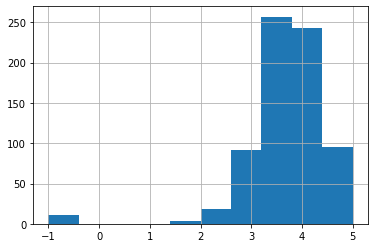

In [7]:
#Pandas support many inbuilt graphs
print(f'Mean is: {df["Rating"].mean()}')
df.Rating.hist()

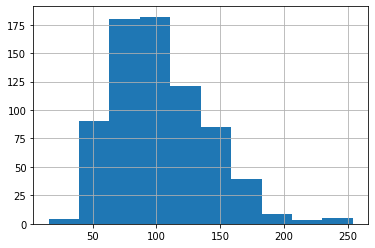

In [8]:
df['avg'].hist()

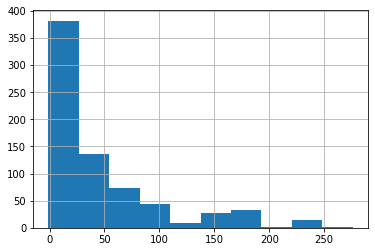

In [9]:
#Age of company is not normally distributed and we will have to NORMALIZE it if we want to use it in our data
#This is exponentially distributed 
df['age'].hist()

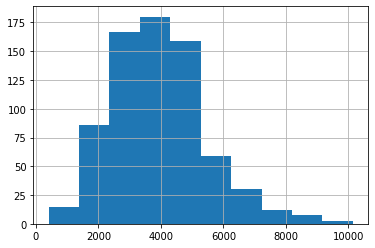

In [10]:
#Almost normally distributed
df['desc_len'].hist()

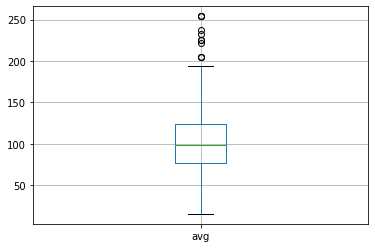

In [11]:
df[['avg']].boxplot()

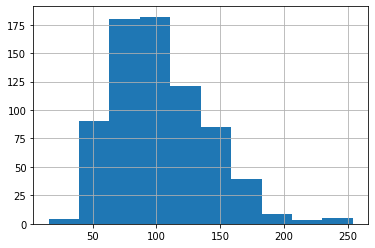

In [12]:
df['avg'].hist()

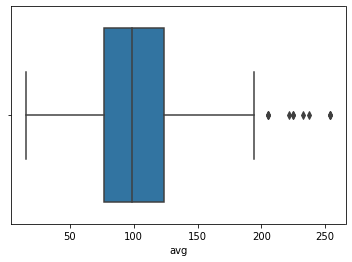

In [13]:
sns.boxplot(x='avg',data=df)

### Finding correlation in some continuos data

In [14]:
df[['age', 'avg', 'Rating','desc_len', 'num_comp']].corr()

,age,avg,Rating,desc_len,num_comp
age,1.000000,0.023266,0.020305,0.167136,0.131188
avg,0.023266,1.000000,0.006131,0.059693,0.056263
Rating,0.020305,0.006131,1.000000,-0.016799,0.026862
desc_len,0.167136,0.059693,-0.016799,1.000000,0.103295
num_comp,0.131188,0.056263,0.026862,0.103295,1.000000


(4.0, 0)

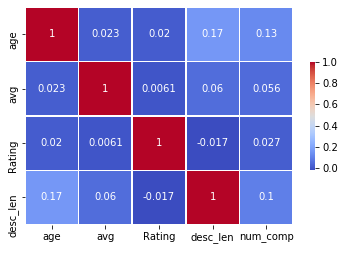

In [15]:
ax=sns.heatmap(df[['age', 'avg', 'Rating','desc_len', 'num_comp']].corr(), cmap='coolwarm', annot=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_ylim(4.0, 0)

### Categorical Data

In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min sal', 'max sal', 'avg', 'State', 'same state', 'age',
       'python_reqd', 'spark_reqd', 'aws_reqd', 'excel_reqd', 'job_simp',
       'seniority', 'desc_len', 'num_comp', 'Company Text'],
      dtype='object')

In [17]:
df_cat=df[[ 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','python_reqd', 'spark_reqd', 'aws_reqd', 'excel_reqd', 'job_simp','seniority']]

The graph for Size has total 9 different values


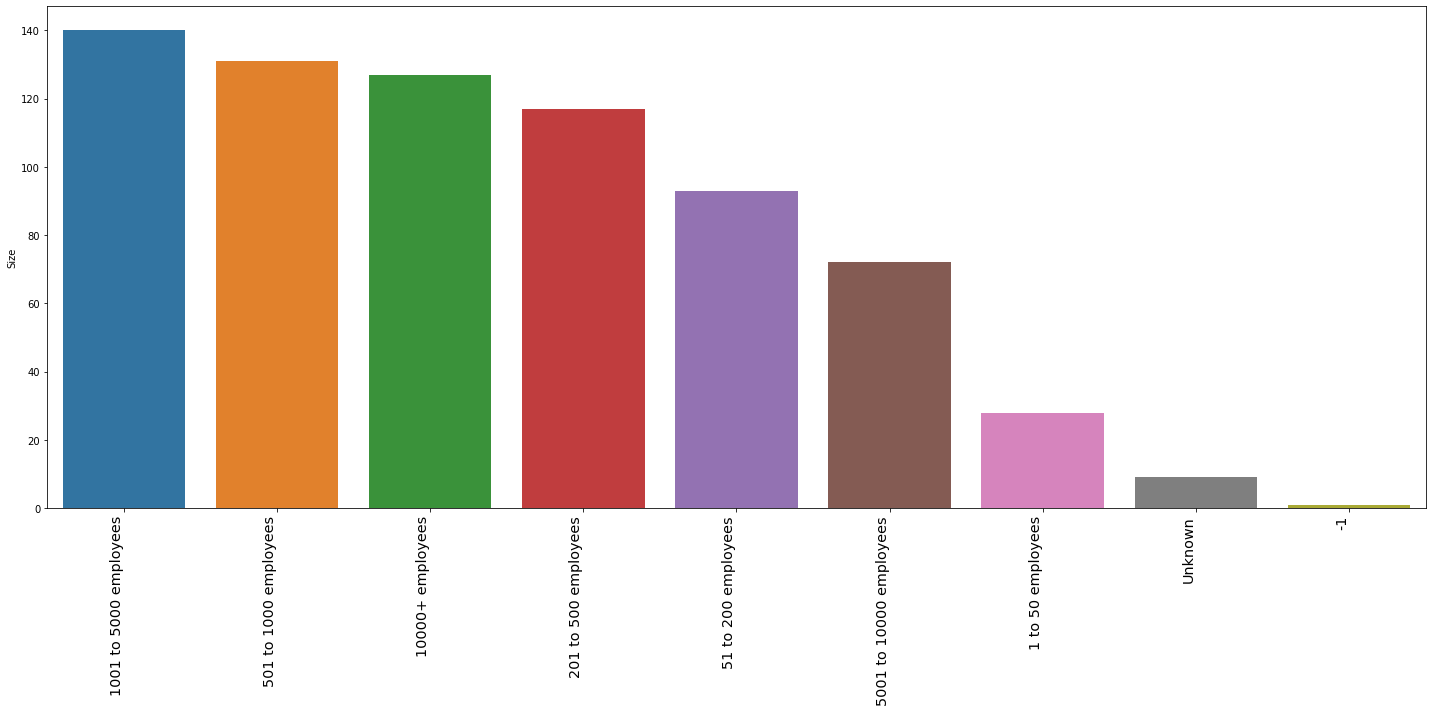

The graph for Type of ownership has total 11 different values


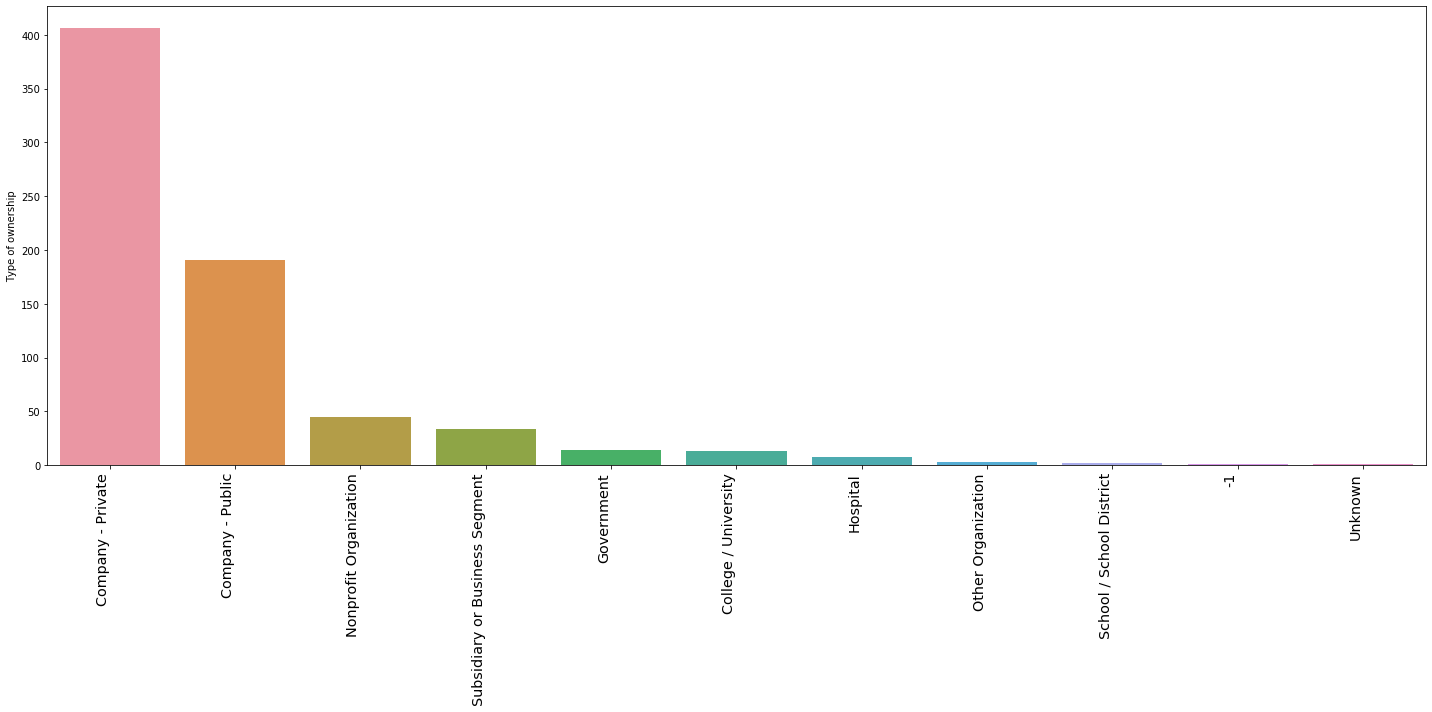

The graph for Industry has total 59 different values


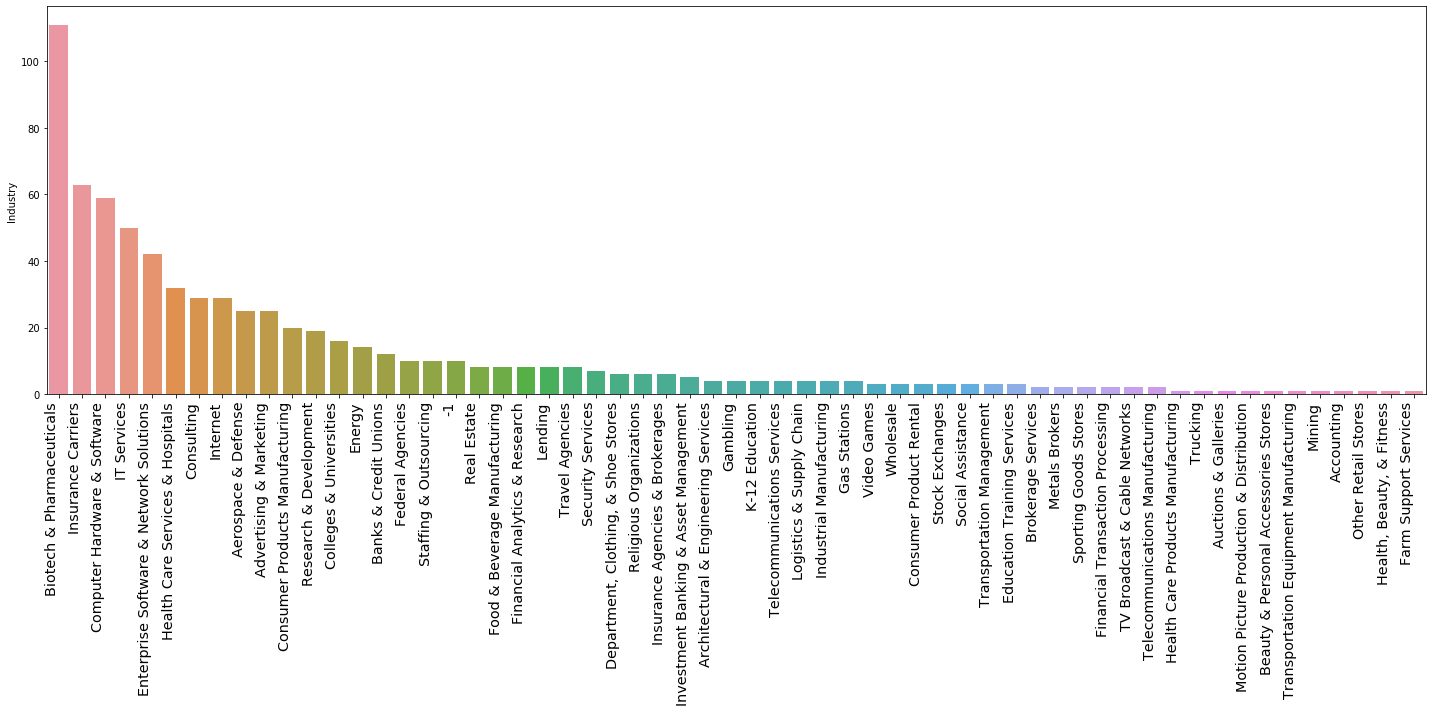

The graph for Sector has total 24 different values


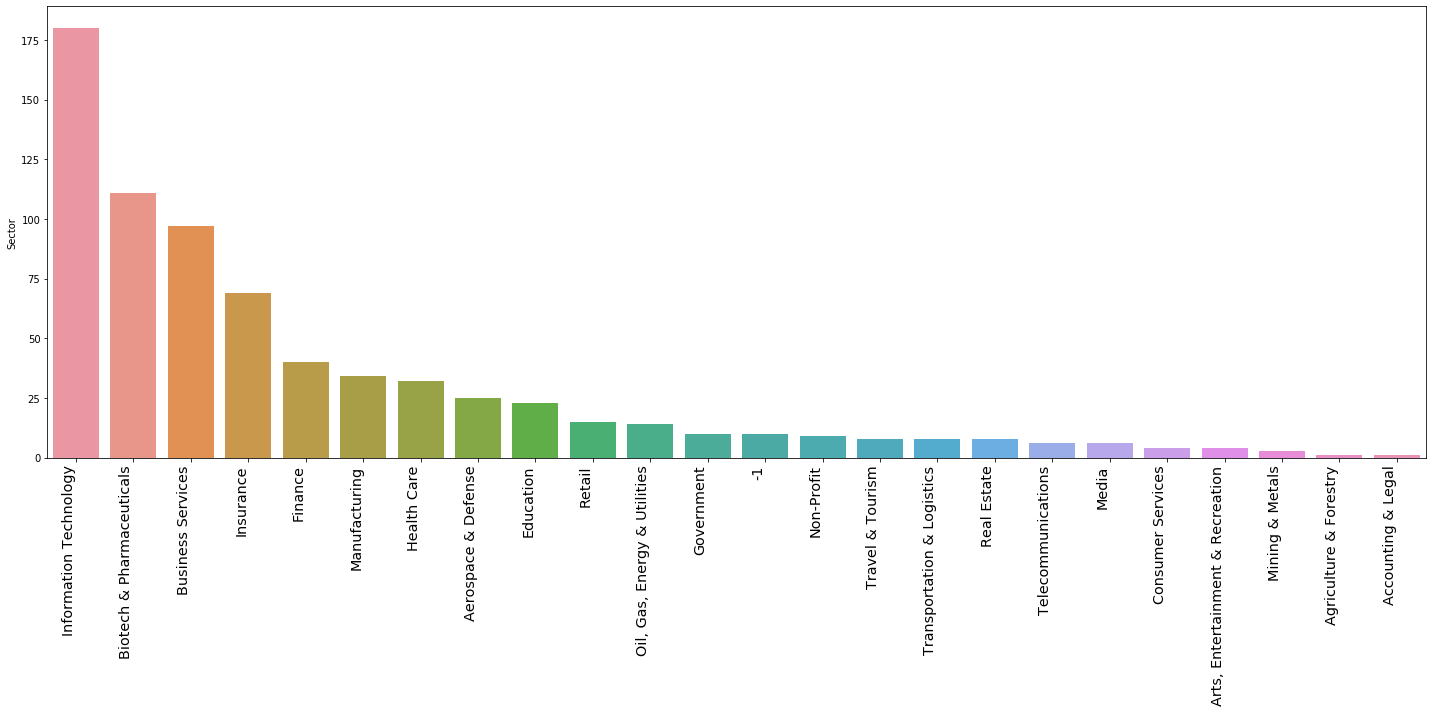

The graph for Revenue has total 14 different values


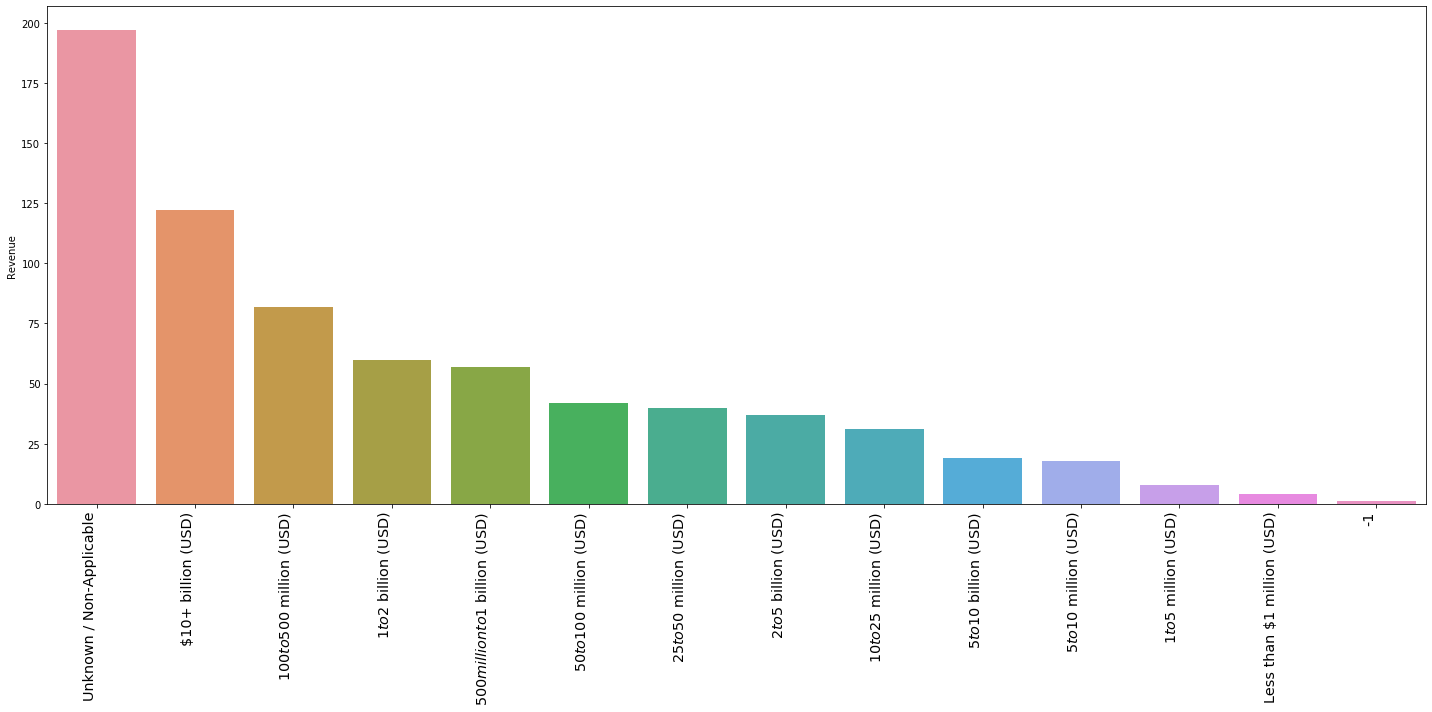

The graph for python_reqd has total 2 different values


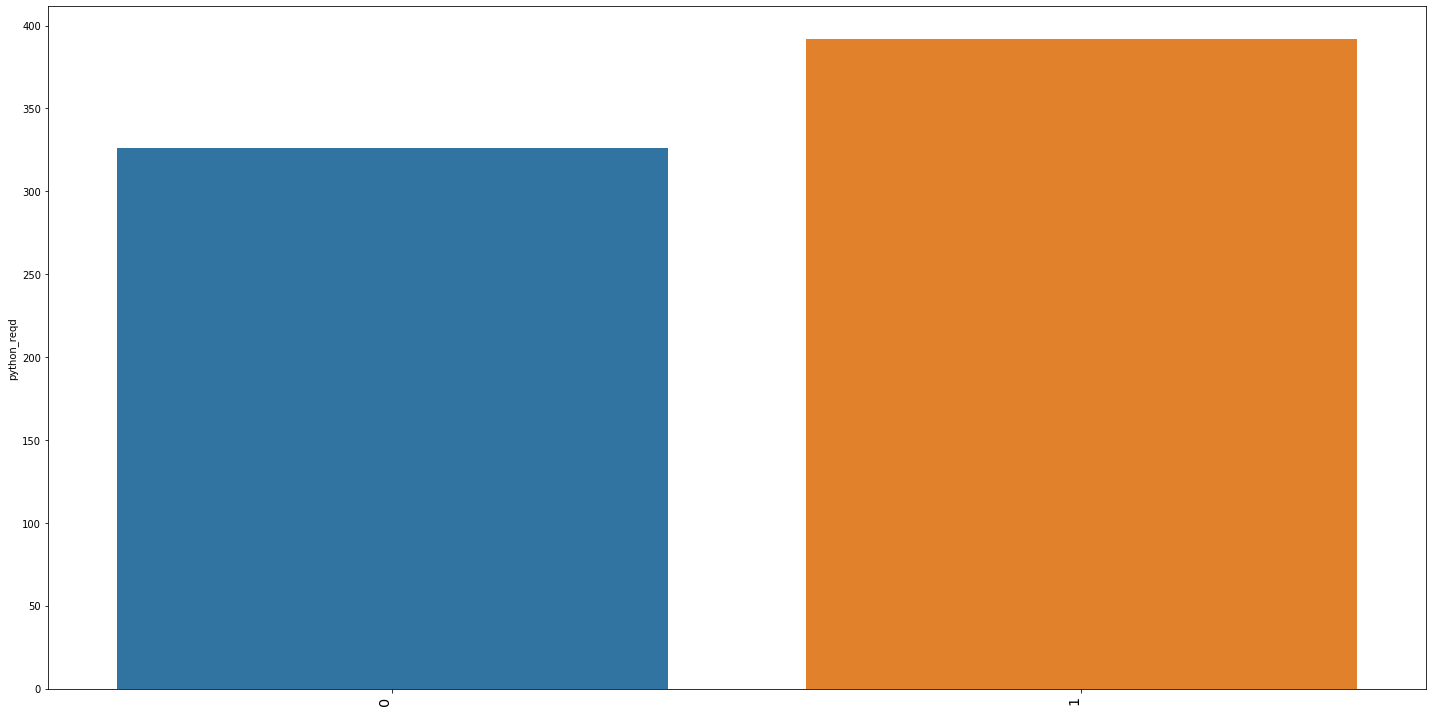

The graph for spark_reqd has total 2 different values


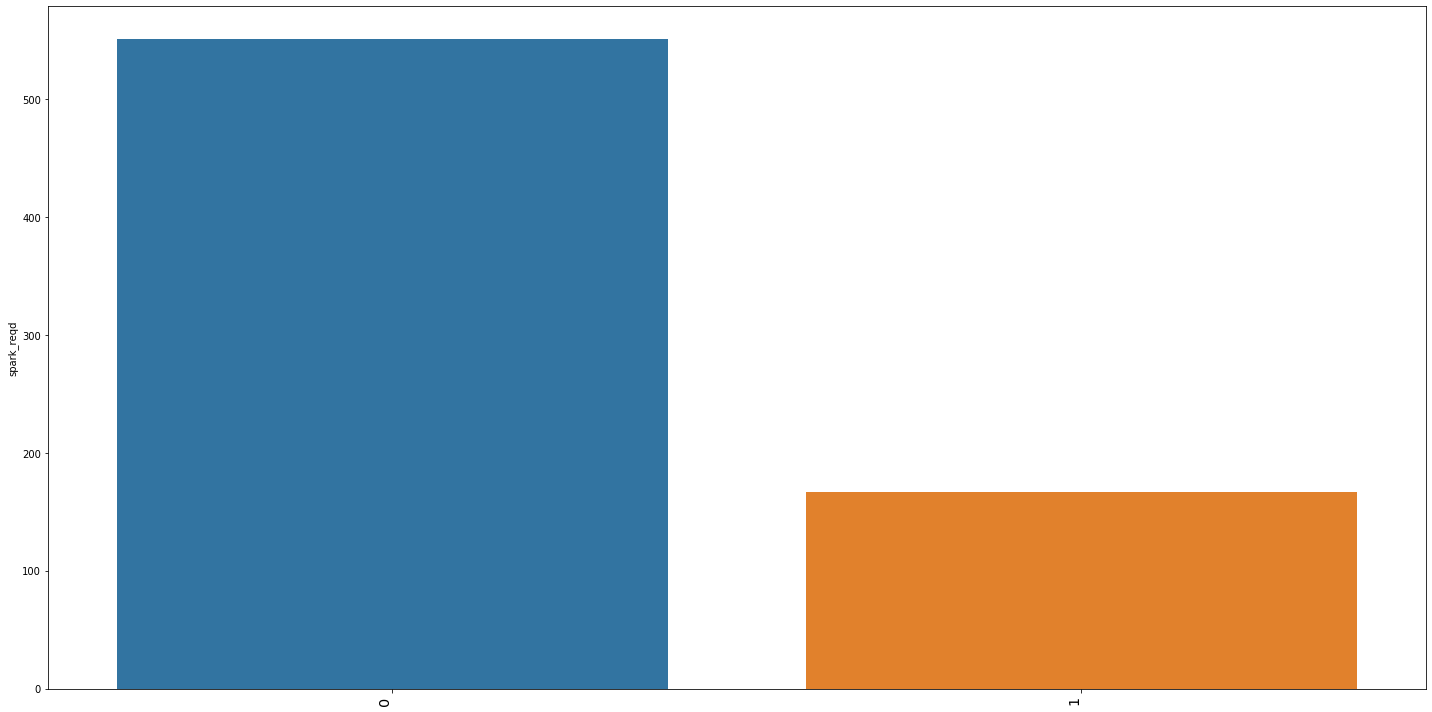

The graph for aws_reqd has total 2 different values


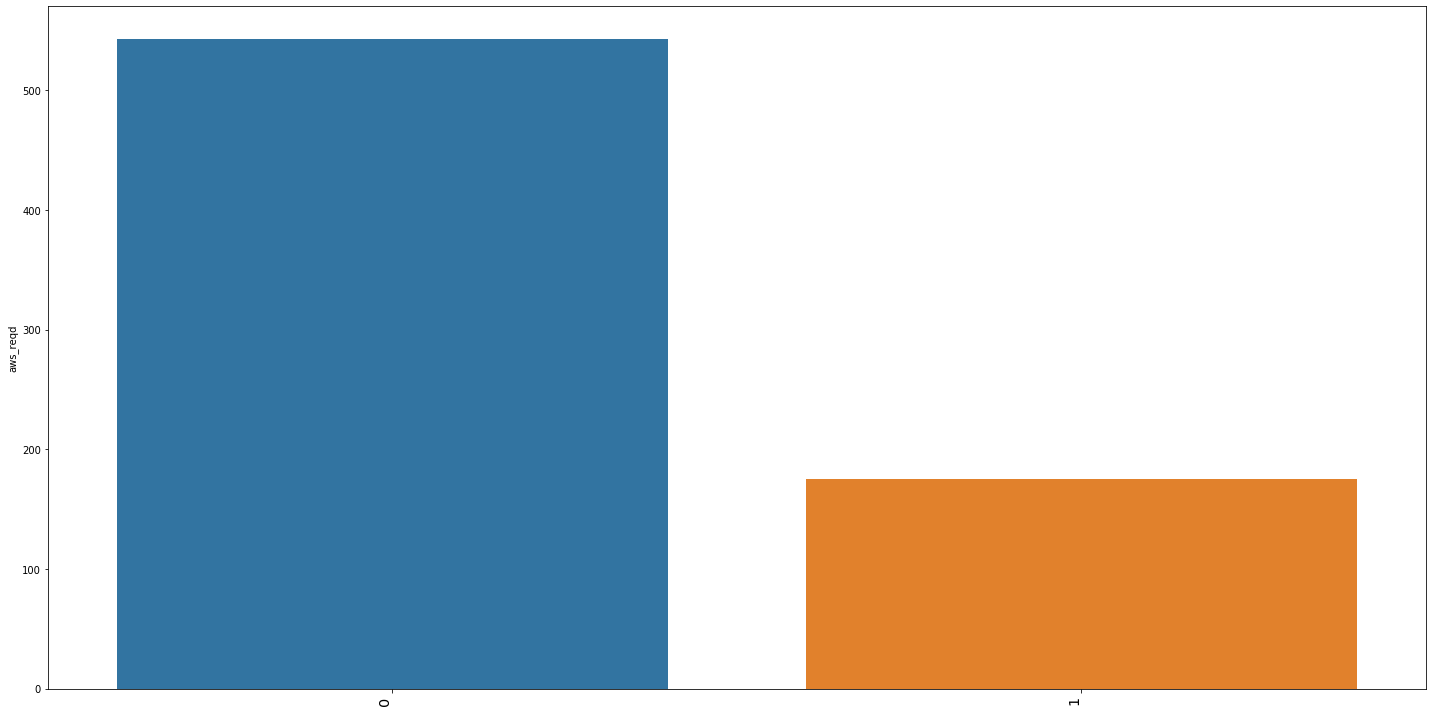

The graph for excel_reqd has total 2 different values


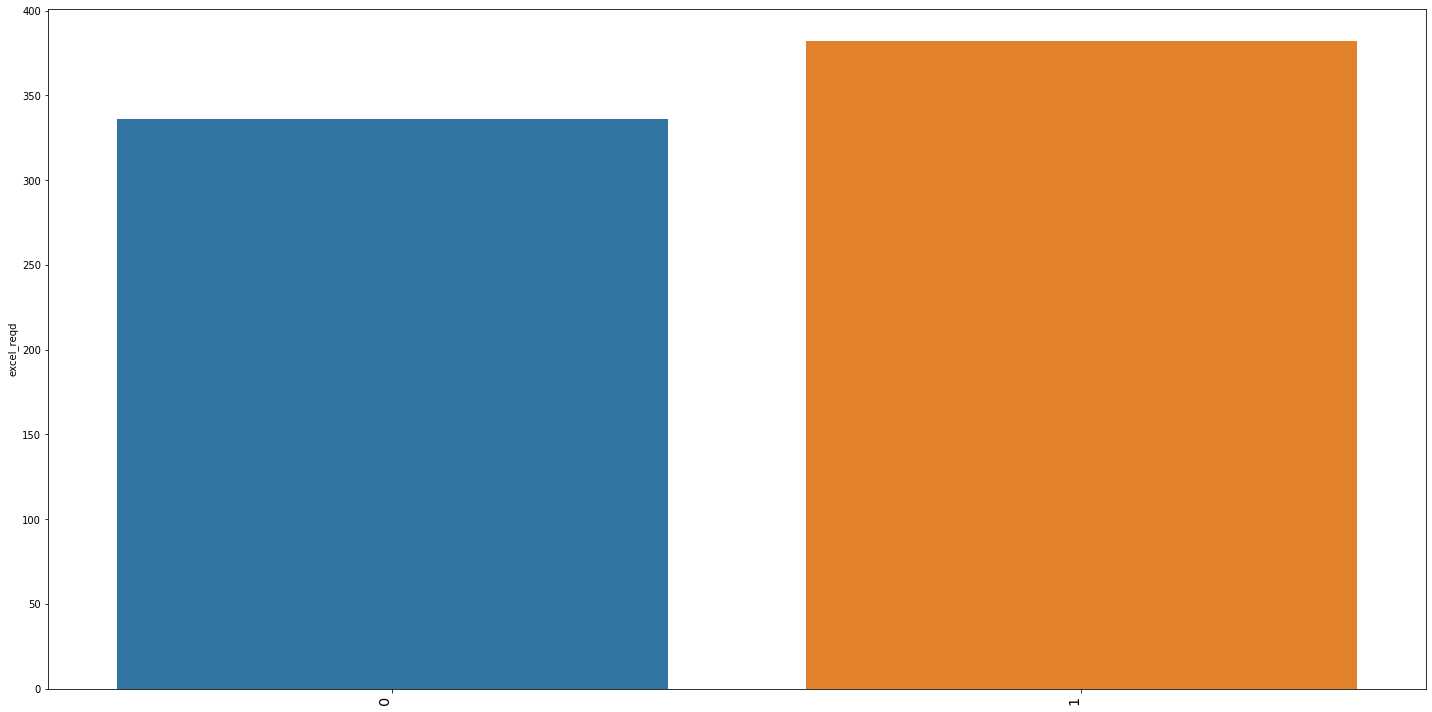

The graph for job_simp has total 6 different values


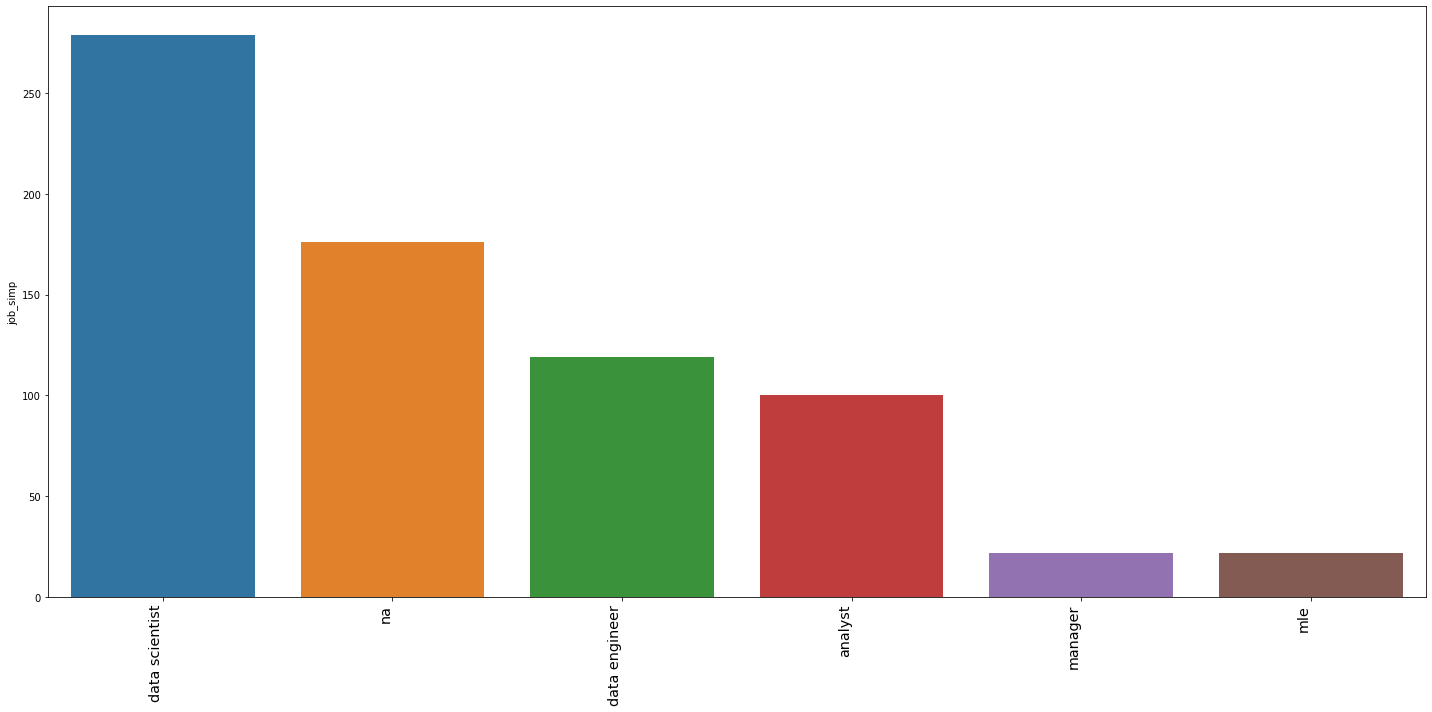

The graph for seniority has total 3 different values


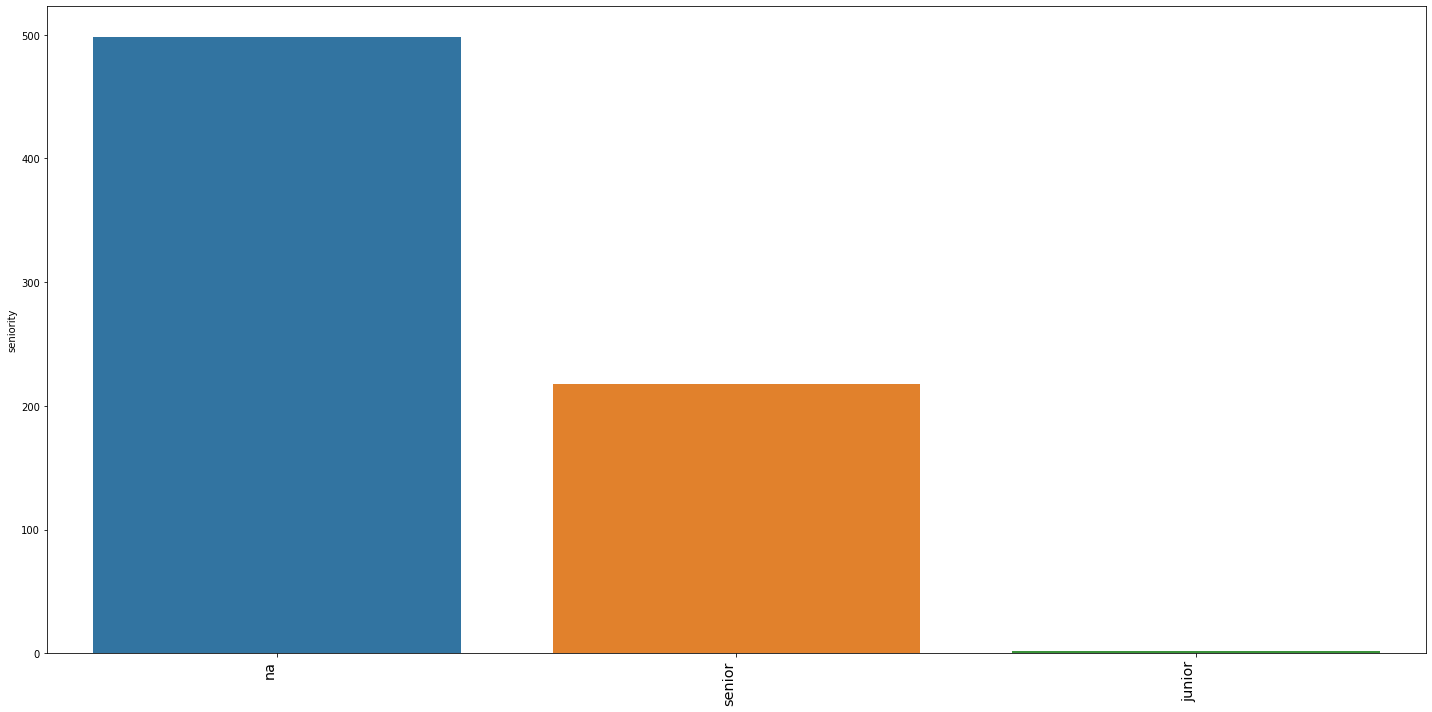

In [18]:
for i in df_cat:
    cat_num=df_cat[i].value_counts()
    print(f'The graph for {i} has total {len(cat_num)} different values')
    plt.figure(figsize=(20,10))
    chart=sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize='x-large')
    plt.tight_layout()
    plt.show()

The graph for Location has 194 values


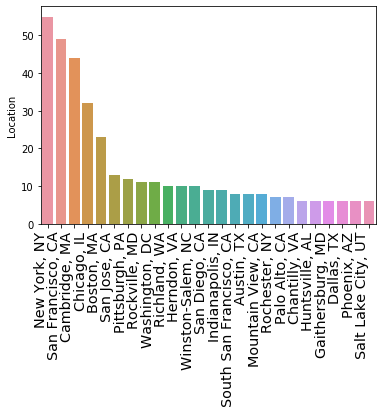

The graph for Headquarters has 191 values


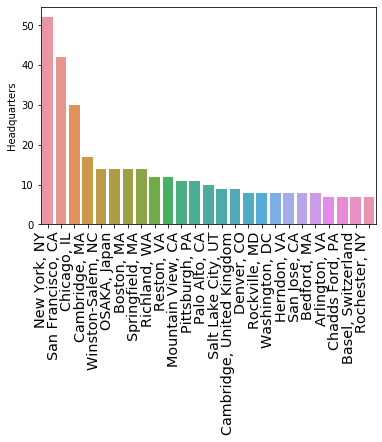

The graph for Company Text has 334 values


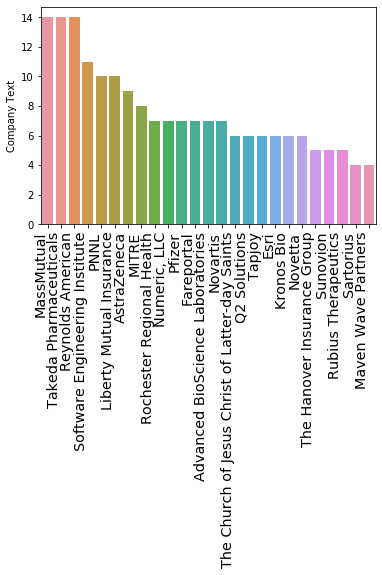

In [19]:
#For values with great number of categories, we'll only look at the head (top 25)
df_cat2=df[['Location', 'Headquarters','Company Text']]
for i in df_cat2:
    print(f'The graph for {i} has {len(df_cat2[i].value_counts())} values')
    x_cat2=df_cat2[i].value_counts().head(25).index
    y_cat2=df_cat2[i].value_counts().head(25)
    chart2=sns.barplot(x=x_cat2, y=y_cat2, data=df)
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize='x-large')
    #plt.tight_layout()
    plt.show()

### Pivot tables

In [20]:
pd.pivot_table(df, index='job_simp', values='avg')

,avg
job_simp,
analyst,66.905000
data engineer,105.403361
data scientist,117.564516
manager,84.022727
mle,126.431818
na,98.866477


In [21]:
pd.pivot_table(df, index=['job_simp',  'seniority'], values='avg')

avg
job_simp       seniority            
analyst        junior      56.500000
               na          61.155405
               senior      84.340000
data engineer  na          96.701220
               senior     124.689189
data scientist junior     106.500000
               na         107.043011
               senior     138.956522
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          93.983193
               senior     109.061404

In [22]:
pd.pivot_table(df, index='State', values='avg').sort_values('avg', ascending=False)

,avg
State,
CA,123.619205
IL,116.662500
DC,110.181818
MA,109.398990
LA,107.500000
NJ,104.558824
TX,100.708333
TN,100.500000
MI,100.250000


In [23]:
pd.pivot_table(df[df['job_simp']=='data scientist'], index=['State', 'job_simp'], values='avg').sort_values('avg', ascending=False)

,,avg
State,job_simp,
DC,data scientist,149.000000
CA,data scientist,143.044776
UT,data scientist,140.500000
MO,data scientist,127.666667
IL,data scientist,117.233333
NC,data scientist,117.000000
NY,data scientist,115.250000
MA,data scientist,113.750000
WI,data scientist,113.500000


In [24]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min sal', 'max sal', 'avg', 'State', 'same state', 'age',
       'python_reqd', 'spark_reqd', 'aws_reqd', 'excel_reqd', 'job_simp',
       'seniority', 'desc_len', 'num_comp', 'Company Text'],
      dtype='object')

In [36]:
df_pivot=df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'python_reqd', 'spark_reqd', 'aws_reqd', 'excel_reqd', 'Type of ownership' , 'avg']]

In [42]:
for i in df_pivot:
    try:
        print(pd.pivot_table(df_pivot,index=i, values='avg').sort_values('avg', ascending=False))
    except:
        pass

               avg
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 4.0    113.139535
 3.9    113.071429
 3.2    110.378788
 2.6    109.083333
 4.4    108.606061
 3.3    108.138889
 3.7    107.887931
 3.5    104.897959
 4.7    103.983871
 4.3    102.468750
 4.2    100.442308
 3.6     98.039474
 3.8     97.808333
 2.2     97.750000
 4.6     97.250000
 2.1     95.900000
 2.7     94.875000
 3.4     94.709302
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
                                                 avg
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Financial Transaction Processing          139.500000
Health, Beauty, & Fitness                 139.500000
Te

In [37]:
pd.pivot_table(df_pivot, index='Revenue', columns='python_reqd', values='avg', aggfunc='count')

python_reqd,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),15.0,16.0
$10+ billion (USD),64.0,58.0
$100 to $500 million (USD),38.0,44.0
$2 to $5 billion (USD),15.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
